In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('../dataset/dataset_preprocessed.csv', encoding='utf-8', header=0, low_memory=False)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406431 entries, 0 to 406430
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   COMISARIA                 406431 non-null  object
 1   DERIVADA_FISCALIA         406431 non-null  object
 2   DIRECCION                 406431 non-null  object
 3   DIST_CIA                  406431 non-null  object
 4   DIST_HECHO                406431 non-null  object
 5   DPTO_CIA                  406431 non-null  object
 6   DPTO_HECHO                406431 non-null  object
 7   EDAD                      406431 non-null  int64 
 8   EST_CIVIL                 406431 non-null  object
 9   LIBRO                     406431 non-null  object
 10  MODALIDAD                 406431 non-null  object
 11  PROV_CIA                  406431 non-null  object
 12  PROV_HECHO                406431 non-null  object
 13  REGION                    406431 non-null  object
 14  SEXO

In [4]:
x = dataset.drop('MODALIDAD', axis=1)
y = dataset['MODALIDAD']

In [5]:
# Separamos las variables categoricas y las numericas en dataset
object_columns = x.select_dtypes(['object']).columns.to_list()
int64_columns = x.select_dtypes(['int64']).columns.to_list()

In [6]:
int_dataset = x[int64_columns]

In [7]:
from sklearn.preprocessing import StandardScaler
standarized = StandardScaler().fit_transform(int_dataset.values)
standarized

array([[-0.31359152, -1.76249113, -1.4425907 , ..., -1.42737165,
        -1.65398851,  0.41546138],
       [ 0.39413007, -1.76249113, -1.4425907 , ..., -1.42737165,
        -1.65398851,  0.41546138],
       [-0.66745232, -1.76249113, -1.4425907 , ..., -1.42737165,
        -1.54016812,  0.88950675],
       ...,
       [-0.49052192,  0.93172512,  1.66468818, ...,  1.67477733,
         1.19152119, -0.05858399],
       [-1.19824352,  0.93172512,  1.66468818, ...,  1.67477733,
         1.76062313, -1.00667473],
       [ 0.21719967,  0.93172512,  1.66468818, ...,  1.39276379,
         1.0777008 , -1.4807201 ]])

In [8]:
standarized_int_dataset = pd.DataFrame(standarized, columns=int64_columns, index=int_dataset.index)

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(standarized_int_dataset, y)

SelectKBest(k='all')

In [10]:
features = []
for i in range(len(fs.scores_)):
    features.append([int64_columns[i], fs.scores_[i]])
feature_list = pd.DataFrame(features, columns=['caracteristica', 'puntaje'])
feature_list = feature_list.sort_values(by='puntaje', ascending=False).reset_index(drop=True)
feature_list

,caracteristica,puntaje
0,EDAD,2274.218462
1,FEC_REGISTRO_ANIO,1471.396077
2,FECHA_HORA_HECHO_ANIO,1429.511982
3,FEC_REGISTRO_MES,156.569413
4,FECHA_HORA_HECHO_MES,147.463043
5,FEC_REGISTRO_DIA_SEM,120.149516
6,FECHA_HORA_HECHO_DIA_SEM,106.114250
7,FEC_REGISTRO_DIA,15.698991
8,FECHA_HORA_HECHO_DIA,14.765140


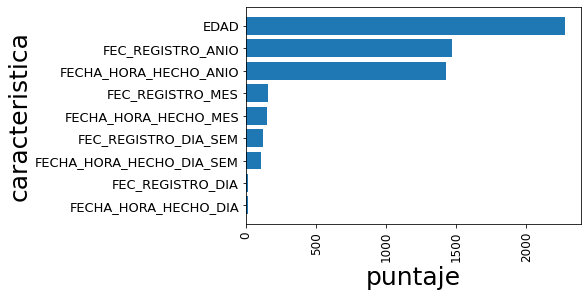

In [11]:
import matplotlib.pyplot as plt

feature_bar = feature_list.iloc[0:10].sort_values(by='puntaje', ascending=True).reset_index(drop=True)
peso = feature_bar['puntaje'].to_numpy()
caracteristica = feature_bar['caracteristica'].to_numpy()

plt.yticks(fontsize= 13)
plt.xticks(fontsize= 12, rotation=90)
plt.ylabel("caracteristica", fontsize=25)
plt.xlabel("puntaje", fontsize=25)
plt.barh(caracteristica, peso)
plt.show()